In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Graph 1 (Stacked Bar: YOF and STA):
df_base = pd.read_csv("CAX_Preprocessed_PROG.csv")
df_ind = pd.read_csv("GICS_Industry.csv")
df = df_base.merge(df_ind, on='IND')
df

,STA,YOF,AGE,IAS,IND,SIZ,FUN,COU,CON,INS,...,PSD.1,PSL.1,PSC.1,PSF,PSI,PSR,GSU,GIN,GIG,GSE
0,Success,NaN,NaN,-1.0,Operations,No,450000.0,United States,North America,2.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,Application Software,Software,Software & Services,Information Technology
1,Success,2010.0,4.0,140.0,Operations,No,6300000.0,United States,North America,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,Application Software,Software,Software & Services,Information Technology
2,Success,2011.0,3.0,374.0,Operations,Yes,60000.0,United States,North America,1.0,...,16.666667,0.0,0.0,0.0,0.0,2.0,Application Software,Software,Software & Services,Information Technology
3,Success,2012.0,2.0,98.0,Operations,No,NaN,United States,North America,5.0,...,0.000000,0.0,0.0,0.0,0.0,6.0,Application Software,Software,Software & Services,Information Technology
4,Success,2013.0,1.0,NaN,Operations,No,NaN,NaN,NaN,1.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,Application Software,Software,Software & Services,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Failed,2007.0,7.0,-2.0,NaN,NaN,1512066.0,United States,North America,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,Failed,NaN,NaN,-61.0,NaN,NaN,5000000.0,United States,North America,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,Failed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,Failed,2008.0,6.0,-53.0,Server Design,NaN,55000000.0,United States,North America,NaN,...,5.882353,0.0,0.0,0.0,0.0,8.0,Communications Equipment,Communications Equipment,Technology Hardware & Equipment,Information Technology


In [3]:
yof_list = np.sort(df['YOF'].drop_duplicates())
print(yof_list)

year_success = np.zeros(len(yof_list))
year_failed = np.zeros(len(yof_list))
for y_s1 in range(len(yof_list)):
    for y_s2 in range(len(df['STA'])):
        if df['STA'][y_s2] == 'Success' and df['YOF'][y_s2] == yof_list[y_s1]:
            year_success[y_s1] += 1
        elif df['STA'][y_s2] == 'Failed' and df['YOF'][y_s2] == yof_list[y_s1]:
            year_failed[y_s1] += 1

year_success = np.delete(year_success, 15)
year_failed = np.delete(year_failed, 15)
yof_list = np.asarray(np.delete(yof_list, 15), dtype=int)

print(year_success)
print(year_failed)
print(yof_list)

[1997. 1999. 2000. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010.
 2011. 2012. 2013.   nan]
[ 0.  1.  3.  3.  1.  0. 12.  4. 22. 17. 33. 60. 55. 68. 18.]
[ 1.  0.  1.  0.  1.  2. 11. 10. 20. 16. 16. 16. 15.  5.  2.]
[1997 1999 2000 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013]


In [4]:

pivot_YOFSTA = pd.pivot_table(df, values='GIG', index='YOF', columns='STA',
                        aggfunc=np.count_nonzero, fill_value=0)

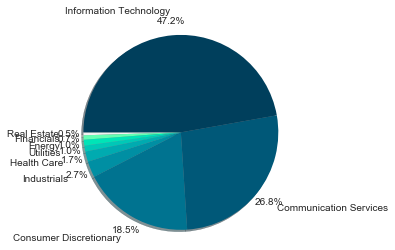

In [5]:
pivot_GSESTA = pd.pivot_table(df, values='YOF', index='GSE', columns='STA',
                        aggfunc=np.count_nonzero, fill_value=0, margins=True)
pivot_GSESTA = pivot_GSESTA.iloc[:-1].sort_values(by='All')

figure2, ax2 = plt.subplots()
plt.style.use('seaborn')
labels = list(pivot_GSESTA.index)
colors = ['#f1f1f1', '#63ffb3', '#00e4b7', '#00c8b7', '#00abb0',
          '#008fa3', '#007390', '#005878', '#003f5c']
ax2.pie(pivot_GSESTA['All'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, pctdistance=1.15, labeldistance=1.25, colors=colors)
ax2.axis('equal')

plt.show()


In [6]:
OptionList = list(df['GSE'].drop_duplicates().sort_values().iloc[:-1])
print(OptionList)

sectors = list(df['GSE'].drop_duplicates())


['Communication Services', 'Consumer Discretionary', 'Energy', 'Financials', 'Health Care', 'Industrials', 'Information Technology', 'Real Estate', 'Utilities']


In [7]:

selected_sector = 'Communication Services'

df_sector = df[df['GSE'] == selected_sector]
pivot_sector1 = pd.pivot_table(df_sector, values='FUN',
                               index=(['GSU']),
                               columns=['STA'],
                               aggfunc=np.nanmean,
                               fill_value=0, margins=True)

pivot_sector1["Last Fund. ($MM avg.)"] = \
    round((pivot_sector1["Failed"] + pivot_sector1["Success"]) / 1000000, 2)
pivot_sector1

STA,Failed,Success,All,Last Fund. ($MM avg.)
GSU,,,,
Advertising,6.880167e+06,4.295307e+06,5.070765e+06,11.18
Interactive Home Entertainment,4.060000e+05,6.000000e+06,2.270667e+06,6.41
Interactive Media & Services,3.579367e+06,5.000000e+05,3.271430e+06,4.08
Movies & Entertainment,2.150450e+07,1.190000e+07,1.830300e+07,33.40
Publishing,0.000000e+00,1.000000e+07,1.000000e+07,10.00
Wireless Telecommunication Services,0.000000e+00,1.000000e+07,1.000000e+07,10.00
All,7.360221e+06,4.806310e+06,5.846792e+06,12.17


In [8]:
# Number of companies
# Number of countries
# Success rate
# Avg. amount of funding raised
# Avg. investors per company
# Avg. advisors per company

df_dict = pd.read_csv("CAX_Summary_Sector.csv", index_col ="Sector")
df_dict

,Companies,Countries,Success rate,Avg. amount of funding raised,Avg. investors,Avg. advisors
Sector,,,,,,
Communication Services,131,9,0.534351,5.846792,2,1
Consumer Discretionary,81,7,0.604938,3.282460,3,1
Energy,4,1,0.250000,4.921250,1,2
Financials,3,1,0.666667,12.633333,1,6
Health Care,8,2,0.625000,9.585714,2,1
Industrials,12,4,0.750000,3.956833,3,2
Information Technology,216,18,0.759259,7.542759,3,2
NaN,11,1,1.000000,3.802413,1,1
Real Estate,2,1,1.000000,3.500000,1,1


In [9]:
sector = 'Communication Services'

companies = int(np.asarray(df_dict.loc[[sector], ['Companies']]))
countries = int(np.asarray(df_dict.loc[[sector], ['Countries']]))
success_rate = round(float(np.asarray(df_dict.loc[[sector], ['Success rate']]))*100, 2)
funding = round(float(np.asarray(df_dict.loc[[sector], ['Avg. amount of funding raised']])), 2)
investors = int(np.asarray(df_dict.loc[[sector], ['Avg. investors']]))
advisors = int(np.asarray(df_dict.loc[[sector], ['Avg. advisors']]))

print(companies, countries, success_rate, funding, investors, advisors)


131 9 53.44 5.85 2 1


def vmb_model():
    value1 = cb_input_sector.get()
    # input2 = cb_value_proof2.get()
    global list_proof2
    options_proof = list_proof2
    choices = [6, 7, 8]
    calculation = 0

    for i in range(len(options_proof)):
        if options_proof[i] == input2:
            value2 = choices[i]
            calculation = '%s and %s'

    label_results.configure(text='Result = %s' % calculation)


In [10]:
dict_sectors = {'Communication Services': ['Advertising', 'Broadcasting', 'Interactive Home Entertainment',
                                               'Interactive Media & Services', 'Movies & Entertainment',
                                               'Publishing', 'Wireless Telecommunication Services'],
                    'Information Technology': ['Application Software', 'Communications Equipment',
                                               'Data Processing & Outsourced Services', 'Systems Software'],
                    'Industrials': ['Air Freight & Logistics', 'Human Resource & Employment Services',
                                    'Research & Consulting Services'],
                    'Utilities': ['Renewable Electricity'],
                    'Consumer Discretionary': ['Education Services', 'General Merchandise Stores',
                                               'Hotels, Resorts & Cruise Lines',
                                               'Internet & Direct Marketing Retail',
                                               'Restaurants', 'Specialized Consumer Services'],
                    'Energy': ['Oil & Gas Equipment & Services'],
                    'Financials': ['Financial Exchanges & Data'],
                    'Health Care': ['Health Care Technology'],
                    'Real Estate':['Real Estate Services']
                    }
list_sectors = list(dict_sectors.keys())
sector_selection = "Real Estate"
list_subindustries = dict_sectors.get(sector_selection)
print(list_subindustries)

['Real Estate Services']


In [11]:
from VMB_Generators.Industry_Selection import *

print(Get_Subindustry(sector_selection))

['Real Estate Services']


In [28]:
dict_AYE = {'High': 0, 'Medium': 2, 'Low': 1}
keys_AYE = list(dict_AYE.keys())
print(keys_AYE)
values_AYE = list(dict_AYE.values())
print(values_AYE)
print(dict_AYE.get('High'))


['High', 'Medium', 'Low']
[0, 2, 1]
0


In [13]:
def LookUp_in_dict(dictionary, value):
    keys_list = list(dictionary.keys())
    values_list = list(dictionary.values())
    try:
        index_list = values_list.index(value)
        key_list = keys_list[index_list]
        return key_list
    except ValueError:
        print("List does not contain value")
        pass

value1 = 2
print(LookUp_in_dict(dict_AYE, value1))

Medium


In [26]:
from VMB_Generators.Model_Generator import *

example = np.reshape(np.array([0,0,1,1,2,0,1,0,1,0,1,0]),(1,12))   # Successful
example1 = np.reshape(np.array([0,0,0,0,0,0,0,0,0,0,0,0]),(1,12))  # Keep trying!

forecast_nr, precision = get_classification(example1)
forecast = ''
if forecast_nr == 0:
    forecast = 'Keep trying'
elif forecast_nr == 1:
    forecast = 'Successful'
print('Forecast: %s' % forecast)
print('Precision = %.2f%%' % (precision*100))


Forecast: Keep trying
Precision = 88.08%
